# Call Me Ace - BET Round 2 Competitor Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

## 1 - Data Cleaning

In [2]:
round2 = pd.read_csv("BET AmpliFind Competitor Analysis - [OLD] Round 2 - Top 25.csv")
print(round2.shape)
round2.head(3)

(50, 28)


,Artist Name,Tiktok link,Twitter link,FB link,IG link,Website,Mailing List?,X?,Round 2?,Round 3?,...,Tiktok likes + shares on BET posts (round 2),Facebook likes on BET posts (round 2),Total Follower Reach,Biggest Social Media Platform?,What have they posted?,What's working for them?,What's Not?,Other Major Social Media?,Other Commentary:,Post Mortem Report: Why did they / did they not make it?
0,A.C. Wells,NaN,NaN,NaN,link,NaN,NaN,NaN,No,NaN,...,NaN,NaN,#REF!,#REF!,NaN,NaN,NaN,NaN,very low monthly listeners on Spotify,NaN
1,Ainae,NaN,link,link,link,link,Yes,x,Yes,No,...,0.0,0.0,990,biggest on instagram,1 grid post and one tweet,she seems to have pretty good engagement,NaN,posts often on youtube,She's a contestant on the current season of th...,NaN
2,Alexis France,NaN,NaN,link,link,None,No,NaN,Yes,No,...,0.0,150.0,200,"IG is really inactive - FB is bigger, and that...",Regular posts on FB,"Decent FB engagement, using a similar strategy...",Not leveraging IG,FB,NaN,NaN


In [3]:
round2.columns

Index(['Artist Name', 'Tiktok link', 'Twitter link', 'FB link', 'IG link',
       'Website', 'Mailing List?', 'X?', 'Round 2?', 'Round 3?',
       'Predicted R3?', 'Why/ Why not?', 'Expected R3?', 'Mark Them',
       'IG follower count', 'IG Likes on all BET Round 2 posts', 'IG Posts',
       'Twitter likes + rt on BET posts',
       'Tiktok likes + shares on BET posts (round 2)',
       'Facebook likes on BET posts (round 2)', 'Total Follower Reach',
       'Biggest Social Media Platform?', 'What have they posted?',
       'What's working for them?', 'What's Not?', 'Other Major Social Media?',
       'Other Commentary: ',
       'Post Mortem Report: Why did they / did they not make it?'],
      dtype='object')

In [4]:
round2numeric = round2.drop(labels = ['Tiktok link', 'Twitter link', 'FB link', 'IG link',
       'Website', 'X?',  'Predicted R3?', 'Why/ Why not?', 'Expected R3?', 'Mark Them',
                      'Biggest Social Media Platform?', 'What have they posted?',
       "What's working for them?", "What's Not?", 'Other Major Social Media?',
       'Other Commentary: ',
       'Post Mortem Report: Why did they / did they not make it?'
                     ], axis = 1)

In [5]:
round2clean = round2numeric[round2numeric["Round 2?"] == "Yes"]
print(round2clean.shape)
round2cleaner = round2clean.replace("Yes", 1).replace("No", 0).fillna(0)
round2cleaner.head(3)

(25, 11)


,Artist Name,Mailing List?,Round 2?,Round 3?,IG follower count,IG Likes on all BET Round 2 posts,IG Posts,Twitter likes + rt on BET posts,Tiktok likes + shares on BET posts (round 2),Facebook likes on BET posts (round 2),Total Follower Reach
1,Ainae,1,1,0,"4,711",800.0,2.0,190.0,0.0,0.0,990
2,Alexis France,0,1,0,546,50.0,1.0,0.0,0.0,150.0,200
3,Ashoka,0,1,0,"3,989",200.0,1.0,0.0,0.0,0.0,200


In [6]:
def decomma(stringlist):
    newlist = []
    for strng in stringlist:
        newlist.append(int(strng.replace(",", '')))
    return newlist

In [7]:
igstrngs = round2cleaner["IG follower count"].to_numpy()
igstrngs = decomma(igstrngs)
round2cleaner["IG follower count"] = igstrngs

In [8]:
TFRstrngs = round2cleaner["Total Follower Reach"]
TFRstrngs = decomma(TFRstrngs)
round2cleaner["Total Follower Reach"] = TFRstrngs

In [9]:
round2cleaner.dtypes

Artist Name                                      object
Mailing List?                                     int64
Round 2?                                          int64
Round 3?                                          int64
IG follower count                                 int64
IG Likes on all BET Round 2 posts               float64
IG Posts                                        float64
Twitter likes + rt on BET posts                 float64
Tiktok likes + shares on BET posts (round 2)    float64
Facebook likes on BET posts (round 2)           float64
Total Follower Reach                              int64
dtype: object

In [10]:
numericdata = round2cleaner.iloc[:, 1:]
target = numericdata["Round 3?"]
prematrixdata = numericdata.drop("Round 3?", axis = 1)
centereddata = numericdata - np.mean(numericdata, axis = 0)
centereddata.head()

,Mailing List?,Round 2?,Round 3?,IG follower count,IG Likes on all BET Round 2 posts,IG Posts,Twitter likes + rt on BET posts,Tiktok likes + shares on BET posts (round 2),Facebook likes on BET posts (round 2),Total Follower Reach
1,0.72,0.0,-0.4,-6228.96,234.8,0.12,145.96,-6.48,-46.52,327.76
2,-0.28,0.0,-0.4,-10393.96,-515.2,-0.88,-44.04,-6.48,103.48,-462.24
3,-0.28,0.0,-0.4,-6950.96,-365.2,-0.88,-44.04,-6.48,-46.52,-462.24
4,-0.28,0.0,0.6,7860.04,734.8,1.12,-44.04,-6.48,-46.52,637.76
6,0.72,0.0,-0.4,-8139.96,-565.2,-1.88,30.96,-6.48,-46.52,-587.24


In [11]:
datamatrix = prematrixdata.drop(["Total Follower Reach"], axis = 1).iloc[:, :].to_numpy()
targetdata = target.to_numpy()
print(datamatrix.shape, targetdata.shape)

(25, 8) (25,)


In [12]:
winnersnlosers = round2cleaner.groupby(["Round 3?"]).mean()
winnersnlosers

,Mailing List?,Round 2?,IG follower count,IG Likes on all BET Round 2 posts,IG Posts,Twitter likes + rt on BET posts,Tiktok likes + shares on BET posts (round 2),Facebook likes on BET posts (round 2),Total Follower Reach
Round 3?,,,,,,,,,
0,0.266667,1.0,9694.533333,423.333333,0.866667,41.533333,0.0,38.266667,503.133333
1,0.300000,1.0,12808.100000,778.000000,3.400000,47.800000,16.2,58.900000,900.900000


## 2 - Exploratory Data Analysis

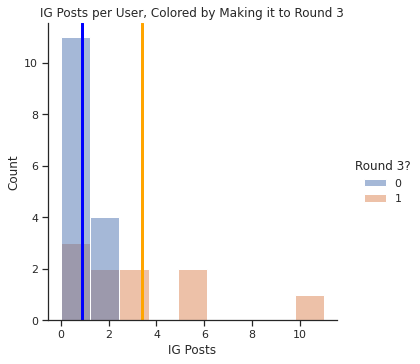

In [13]:
sns.displot(data = round2cleaner, x = "IG Posts", hue = "Round 3?")
plt.title("IG Posts per User, Colored by Making it to Round 3")
plt.axvline(winnersnlosers.iloc[0,4], color = "blue", linewidth = 3)
plt.axvline(winnersnlosers.iloc[1,4], color = "orange", linewidth = 3)

Text(0.5, 1.0, 'Likes Per User, Colored by Making it to Round 3')

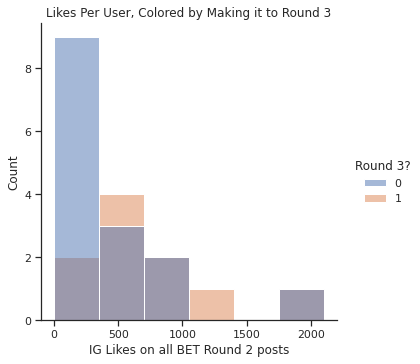

In [14]:
sns.displot(data = round2cleaner, x = "IG Likes on all BET Round 2 posts", hue = "Round 3?")
plt.title("Likes Per User, Colored by Making it to Round 3")

Text(0.5, 1.0, 'Total Follower Reach per User, Colored by Making it to Round 3')

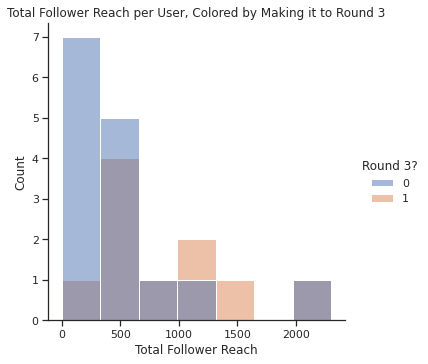

In [15]:
sns.displot(data = round2cleaner, x = "Total Follower Reach", hue = "Round 3?")
plt.title("Total Follower Reach per User, Colored by Making it to Round 3")

Text(0.5, 1.0, 'IG Posts vs. IG Likes with LLSE')

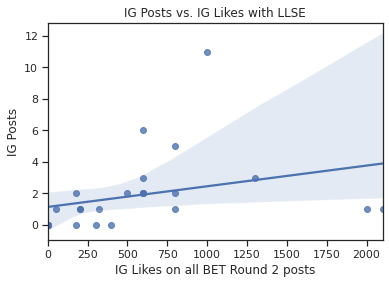

In [16]:
sns.regplot(data = round2cleaner, x = "IG Likes on all BET Round 2 posts", y = "IG Posts")
plt.title("IG Posts vs. IG Likes with LLSE")

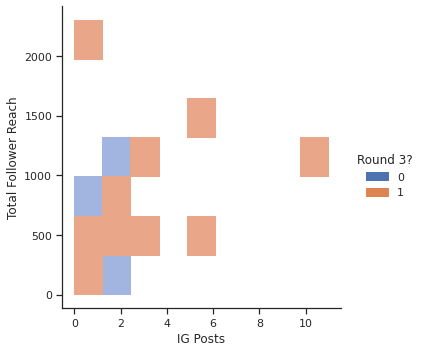

In [23]:
sns.displot(data = round2cleaner, x = "IG Posts", y = "Total Follower Reach", hue = "Round 3?")

### Thoughts
- First: number of IG posts is an almost **perfect** predictor of making it to round 3, due largely to the fact that so many artists suffered from *"Dana Vaughns Syndrome* and refused to post multiple times, costing them the round
- Second: on the other hand, IG likes **had a much less significant correlation with making it to round 3**, i.e. a strong follower base or a lot of posting is more significant than a wide reach, which also agrees with our qualitative findings
- Third: Total Follower reach is closer to IG likes in that it's correlated with success but not a true predictor.
- Finally, IG Posts and IG likes are **not strongly correlated**, thanks to a handful of people who posted just once and received a ton of likes, versus some people who posted a tremendous of number of times and got less attention, as to be expected

## 3 - RFE Feature Selection for Assessment of Success Factors

In [17]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

0.9992123740888874

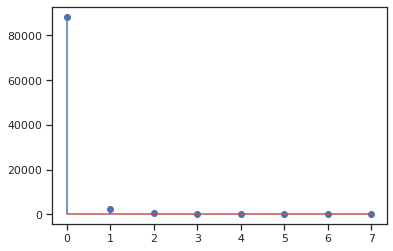

In [18]:
u, s, vt = np.linalg.svd(datamatrix, full_matrices = False)
plt.stem(s)
s[0] ** 2 / sum(s ** 2)

In [19]:
numericblind = numericdata.drop(["Round 3?"], axis = 1)

In [20]:
X = numericblind
y = target
reg = RidgeCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef1 = pd.Series(reg.coef_, index = X.columns)
coef1

Best alpha using built-in LassoCV: 10.000000
Best score using built-in LassoCV: 0.515629


Mailing List?                                  -0.049195
Round 2?                                        0.000000
IG follower count                              -0.000002
IG Likes on all BET Round 2 posts              -0.001993
IG Posts                                        0.097164
Twitter likes + rt on BET posts                -0.001945
Tiktok likes + shares on BET posts (round 2)    0.008167
Facebook likes on BET posts (round 2)          -0.002001
Total Follower Reach                            0.002229
dtype: float64

Text(0.5, 1.0, 'Feature importance using Ridge Model')

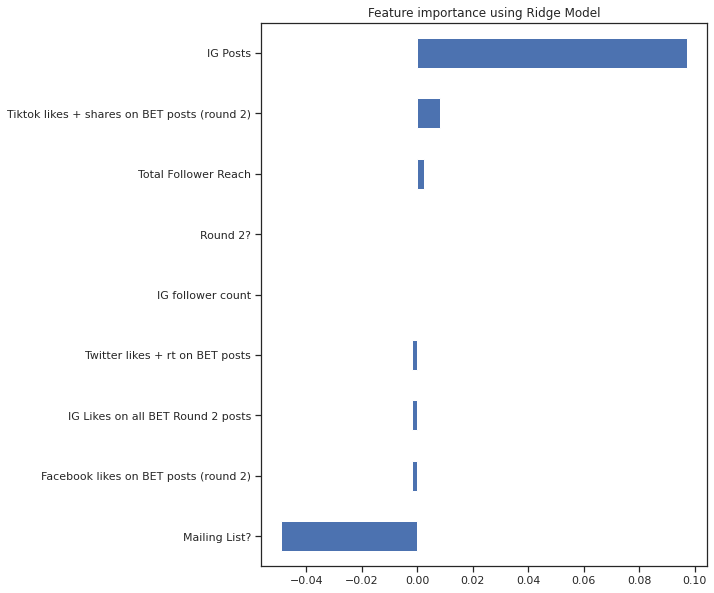

In [21]:
imp_coef = coef1.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

# Analysis
- Numerically, the biggest indicator of success in this competition is **number of IG posts**, and what *Call Me Ace* and I have ascertained from that is that "IG Posts" is the best proxy for **effort** in this competition. We hypothesize that people who are willing to post 3,4,5 times are also willing to text their high school friends, to reach out to old group chats, to think of a way to get everyone they know as involved as possible. <br>


- To that point, that explains why some other metrics that seem like they should be strong predictors of votes, which is essentially reach, such as **total follower reach** and **IG follower count**. However, "IG follower count", seems to have **no** bearing on the result, at least according to the Ridge model. <br> 


- **tl;dr**: follower count isn't the answer, neither is raw engagement, success is more accurately measured via how many channels and individual posts people are willing to make, and success also seems directly tied to how "hungry" an artist is, or how many channels they're willing to activate